In [40]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score

#Dataset
data = pd.read_csv('Hitters.csv').dropna() #drop the null values
print(data.shape)
#convert the categorical values into dummies
dummies = pd.get_dummies(data[['League', "Division", 'NewLeague']], dtype=int).astype('category')
print(dummies.shape)
#drop the data
data = data.drop(['League', 'Division', 'NewLeague'], axis=1)
print(data.shape)
#concatenate data across columns
data = pd.concat([data, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
print(data.shape)



(263, 20)
(263, 6)
(263, 17)
(263, 20)


In [41]:
#scale data
scaled_data = scale(data)
data.head()
#create dataframe
data = pd.DataFrame(scaled_data, columns = data.columns)
print(data.shape)

(263, 20)


In [42]:

x = data.drop(['Salary'], axis=1)
y= data.Salary
x_train, x_test,y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=6)

[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

Text(0, 0.5, 'Coefficients')

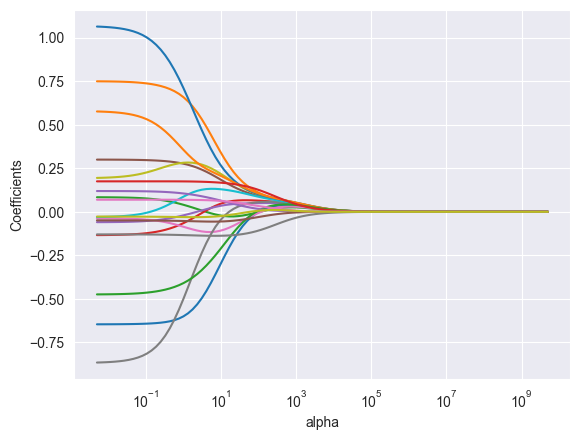

In [45]:
#generate alphas
alphas = 10 ** np.linspace(10, -2, 100)*0.5
print(alphas)

#create ridge mode
ridge_model = Ridge()
coefs = [] #add empt coefficient
for alpha in alphas:
    ridge_model.set_params(alpha=alpha)
    ridge_model.fit(x, y)
    coefs.append(ridge_model.coef_)
np.shape(coefs)
#plot the coefficients
#ridge
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')





In [49]:
ridge_model_csv = RidgeCV(alphas=alphas, scoring='r2')
#dit the the model
ridge_model_csv.fit(x,y)
print(ridge_model_csv.alpha_)
best_ridge_model = Ridge(alpha=ridge_model_csv.alpha_)
#train on the trained data
best_ridge_model.fit(x_train, y_train)
y_hat= best_ridge_model.predict(x_test)
r_square = r2_score(y_test, y_hat)
print("R_squared ", r_square)
pd.Series(best_ridge_model.coef_, index=x.columns)



3.0679536367065814
R_squared  0.31434216398893233


AtBat         -0.414162
Hits           0.447689
HmRun          0.076465
Runs           0.004598
RBI           -0.114415
Walks          0.296329
Years         -0.126216
CAtBat        -0.365415
CHits          0.302175
CHmRun         0.245075
CRuns          0.525685
CRBI           0.269994
CWalks        -0.374026
PutOuts        0.103362
Assists        0.083426
Errors        -0.074696
League_N      -0.008124
Division_W    -0.147668
NewLeague_N    0.046746
dtype: float64

In [51]:
best_ridge_model = Ridge(alpha=0)
#train on the trained data
best_ridge_model.fit(x_train, y_train)
best_ridge_model.predict(x_test)
r_square = r2_score(y_test, y_hat)
print("R_squared ", r_square)
pd.Series(best_ridge_model.coef_, index=x.columns)


R_squared  0.31434216398893233


AtBat         -0.484172
Hits           0.594523
HmRun          0.172738
Runs          -0.113026
RBI           -0.209452
Walks          0.336335
Years          0.026307
CAtBat        -1.834904
CHits          1.046151
CHmRun         0.210882
CRuns          1.033817
CRBI           0.437746
CWalks        -0.438634
PutOuts        0.108847
Assists        0.138389
Errors        -0.085110
League_N      -0.016750
Division_W    -0.143094
NewLeague_N    0.062284
dtype: float64

[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

Text(0, 0.5, 'Coefficients')

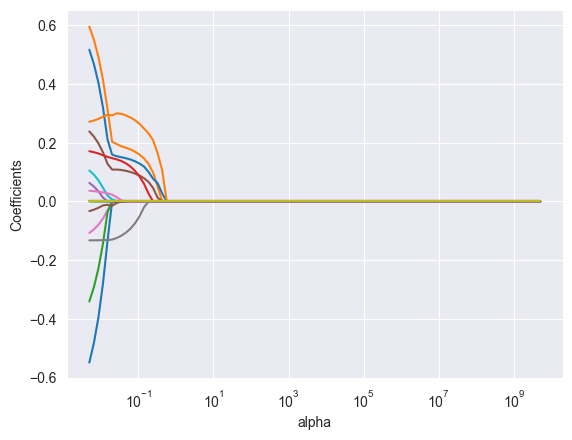

In [56]:
#create test for Lasso
#Generate some alphas
alphas1 = 10 ** np.linspace(10,-2,100)*0.5
print(alphas)
lasso_model = Lasso()
coefs1 = [] #add empt coefficient
for alpha in alphas1:
    lasso_model.set_params(alpha=alpha)
    lasso_model.fit(x, y)
    coefs1.append(lasso_model.coef_)
np.shape(coefs1)
#plot the coefficients
ax = plt.gca()
ax.plot(alphas1, coefs1)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')


In [61]:
lasso_model_csv = LassoCV(alphas=alphas)
#train the the model
lasso_model_csv.fit(x,y)
print(lasso_model_csv.alpha_)
lasso_best_model = Lasso(alpha=lasso_model_csv.alpha_)
#train on the trained data
lasso_best_model.fit(x_train, y_train)
y_hat= lasso_best_model.predict(x_test)
r_square = r2_score(y_test, y_hat)
print("R_squared ", r_square)
pd.Series(lasso_best_model.coef_, index=x.columns)

0.005
R_squared  0.32670003563424466


AtBat         -0.473999
Hits           0.487166
HmRun          0.031946
Runs          -0.000000
RBI           -0.050962
Walks          0.296022
Years         -0.090363
CAtBat        -0.329976
CHits          0.000000
CHmRun         0.203142
CRuns          0.802366
CRBI           0.310727
CWalks        -0.424633
PutOuts        0.104723
Assists        0.068454
Errors        -0.056922
League_N       0.000000
Division_W    -0.136560
NewLeague_N    0.039227
dtype: float64